# TC 5033
## Deep Learning
## Fully Connected Deep Neural Networks

#### Activity 1b: Implementing a Fully Connected Network for Kaggle ASL Dataset

- Objective

The aim of this part of the activity is to apply your understanding of Fully Connected Networks by implementing a multilayer network for the [Kaggle ASL (American Sign Language) dataset](https://www.kaggle.com/datasets/grassknoted/asl-alphabet). While you have been provided with a complete solution for a Fully Connected Network using Numpy for the MNIST dataset, you are encouraged to try to come up with the solution.

- Instructions

    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Load and Preprocess Data: You are provided a starter code to load the data. Be sure to understand the code.

    Review MNIST Notebook (Optional): Before diving into this activity, you have the option to revisit the MNIST example to refresh your understanding of how to build a Fully Connected Network using Numpy.

    Start Fresh: Although you can refer to the MNIST solution at any point, try to implement the network for the ASL dataset on your own. This will reinforce your learning and understanding of the architecture and mathematics involved.

    Implement Forward and Backward Pass: Write the code to perform the forward and backward passes, keeping in mind the specific challenges and characteristics of the ASL dataset.
    
     Design the Network: Create the architecture of the Fully Connected Network tailored for the ASL dataset. Choose the number of hidden layers, neurons, and hyperparameters judiciously.

    Train the Model: Execute the training loop, ensuring to track performance metrics such as loss and accuracy.

    Analyze and Document: Use Markdown cells to document in detail the choices you made in terms of architecture and hyperparameters, you may use figures, equations, etc to aid in your explanations. Include any metrics that help justify these choices and discuss the model's performance.  

- Evaluation Criteria

    - Code Readability and Comments
    - Appropriateness of chosen architecture and hyperparameters for the ASL dataset
    - Performance of the model on the ASL dataset (at least 70% acc)
    - Quality of Markdown documentation

- Submission

Submit this Jupyter Notebook in canvas with your complete solution, ensuring your code is well-commented and includes Markdown cells that explain your design choices, results, and any challenges you encountered.


In [ ]:
import numpy as np
import string
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import os

%load_ext autoreload
%autoreload 2
#################################
%matplotlib inline


In [ ]:
# DATA_PATH = '/media/pepe/DataUbuntu/Databases/asl_data/'
DATA_PATH = '/home/kurtbadelt/MNA/Advanced_ML/Actividad_1b/asl_data/asl_data'
train_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_train.csv'))
valid_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_valid.csv'))

In [ ]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


### Importar Images

In [ ]:
y_train = np.array(train_df['label'])
y_val = np.array(valid_df['label'])
del train_df['label']
del valid_df['label']
x_train = train_df.values.astype(np.float32)
x_val = valid_df.values.astype(np.float32)

In [ ]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


x_train shape: (27455, 784)
y_train shape: (27455,)


In [ ]:
# print the firist 5 rows of the x_train and y_train
print(x_train[:5])
print(y_train[:5])

[[107. 118. 127. ... 204. 203. 202.]
 [155. 157. 156. ... 103. 135. 149.]
 [187. 188. 188. ... 195. 194. 195.]
 [211. 211. 212. ... 222. 229. 163.]
 [164. 167. 170. ... 163. 164. 179.]]
[ 3  6  2  2 12]


In [ ]:


def split_val_test(x, y, pct=0.5, shuffle=True):
    '''
    Splits the dataset into validation and test sets based on the given percentage.

    Parameters:
    - x (numpy.ndarray): Feature data.
    - y (numpy.ndarray): Labels corresponding to the feature data.
    - pct (float): Proportion of the data to include in the validation set (between 0 and 1).
    - shuffle (bool): Whether to shuffle the data before splitting.

    Returns:
    - x_val (numpy.ndarray): Validation feature data.
    - y_val (numpy.ndarray): Validation labels.
    - x_test (numpy.ndarray): Test feature data.
    - y_test (numpy.ndarray): Test labels.
    '''
    # Ensure x and y have the same number of samples
    assert x.shape[0] == y.shape[0], "The number of samples in x and y must be equal."

    num_samples = x.shape[0]
    indices = np.arange(num_samples)

    if shuffle:
        np.random.shuffle(indices)

    # Calculate the number of samples for the validation set
    num_val_samples = int(np.floor(num_samples * pct))

    # Split indices for validation and test sets
    val_indices = indices[:num_val_samples]
    test_indices = indices[num_val_samples:]

    # Create validation and test sets
    x_val = x[val_indices]
    y_val = y[val_indices]
    x_test = x[test_indices]
    y_test = y[test_indices]

    return x_val, y_val, x_test, y_test


In [ ]:
x_val, y_val, x_test, y_test = split_val_test(x_val, y_val)

In [ ]:
### The following

alphabet=list(string.ascii_lowercase)
alphabet.remove('j')
alphabet.remove('z')
print(len(alphabet))
print(alphabet)

24
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y']


### Normalise

In [ ]:
def normalise(x_mean, x_std, x_data):
    x_std_adj = np.where(x_std == 0, 1e-8, x_std)
    return (x_data - x_mean) / x_std_adj


In [ ]:
x_mean = x_train.mean()
x_std = x_train.std()

x_train = normalise(x_mean, x_std, x_train)
x_val = normalise(x_mean, x_std, x_val)
x_test = normalise(x_mean, x_std, x_test)

In [ ]:
x_train.mean(), x_train.std()

(np.float32(3.6268384e-06), np.float32(0.99999946))

### Graficar muestras

x_train shape: (27455, 784)
y_train shape: (27455,)


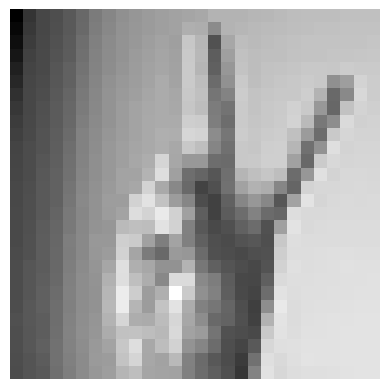

Actual letter: v


In [ ]:


print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)



# Plot the image
def plot_image(image):
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

idx = np.random.randint(len(y_test))
actual_index = y_test[idx]
plot_image(x_test[idx].reshape(28, 28))
print(f"Actual letter: {alphabet[actual_index]}")

### Ecuaciones para nuestro modelo


$$z^1 = W^1 X + b^1$$

$$a^1 = ReLU(z^1) $$

$$z^2 = W^2 a^1 + b^2$$

$$\hat{y} = \frac{e^{z^{2_k}}}{\sum_j{e^{z_j}}}$$


$$ \mathcal{L}(\hat{y}^{i}, y^{i}) =  - y^{i}  \ln(\hat{y}^{i}) = -\ln(\hat{y}^i)$$


$$ \mathcal{J}(w, b) =  \frac{1}{num\_samples} \sum_{i=1}^{num\_samples}-\ln(\hat{y}^{i})$$

### Funciones adicionales

#### Mini batches

In [ ]:
def create_minibatches(mb_size, x, y, shuffle = True):
    '''
    x  #muestras, 784
    y #muestras, 1
    '''
    assert x.shape[0] == y.shape[0], 'Error en cantidad de muestras'
    total_data = x.shape[0]
    if shuffle:
        idxs = np.arange(total_data)
        np.random.shuffle(idxs)
        x = x[idxs]
        y = y[idxs]
    return ((x[i:i+mb_size], y[i:i+mb_size]) for i in range(0, total_data, mb_size))

## Nuestra clase Linear, ReLU y Sequential

In [ ]:
class Tensor:
    def __init__(self, data):
        self.data = data  # numpy array
        self.grad = np.zeros_like(data)


###  Clase Linear

In [ ]:
class Linear:
    def __init__(self, input_size, output_size):
        std_dev = np.sqrt(2.0 / input_size)
        self.W = Tensor(np.random.randn(output_size, input_size) * std_dev)
        self.b = Tensor(np.zeros((output_size, 1)))

    def forward(self, X): #antes __call__ cambié por forward para que sea más claro
        self.input = X.data  # Store as NumPy array
        Z_data = self.W.data @ self.input + self.b.data
        return Tensor(Z_data)

    def backward(self, grad_output):
        """
        Performs the backward pass.

        Parameters:
        - grad_output (np.ndarray): Gradient of the loss with respect to the output Z.

        Returns:
        - grad_input (np.ndarray): Gradient with respect to the input X.
        """
        # Update gradients of parameters
        self.W.grad += grad_output @ self.input.T
        self.b.grad += np.sum(grad_output, axis=1, keepdims=True)
        # Compute gradient with respect to input
        grad_input = self.W.data.T @ grad_output
        return grad_input  # Return as NumPy array




### Clase ReLU

In [ ]:
class ReLU:
    def forward(self, X):
        self.input = X
        A_data = np.maximum(0, X.data)
        A = Tensor(A_data)
        return A

    def backward(self, grad_output):
        """
        Backward pass for ReLU activation.

        Parameters:
        - grad_output (np.ndarray): Gradient of the loss with respect to the output of ReLU.

        Returns:
        - grad_input (np.ndarray): Gradient with respect to the input Z.
        """
        grad_input = grad_output * (self.input.data > 0)
        return grad_input  # Return as NumPy array

### Clase Sequential

In [ ]:
def softmax(Z):
    """
    Applies the softmax function to the input array.

    Parameters:
    - Z (np.ndarray): Input array.

    Returns:
    - np.ndarray: Softmax probabilities.
    """
    exp_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)


In [ ]:
class Sequential:
    def __init__(self, layers):
        self.layers = layers

    def forward(self, X):
        for layer in self.layers:
            X = layer.forward(X)
        return X

    def backward(self, loss_grad):
        grad = loss_grad
        for layer in reversed(self.layers):
            grad = layer.backward(grad)

    def zero_grad(self):
        for layer in self.layers:
            if hasattr(layer, 'W'):
                layer.W.grad.fill(0)
                layer.b.grad.fill(0)

    def update_parameters(self, learning_rate):
        for layer in self.layers:
            if hasattr(layer, 'W'):
                layer.W.data -= learning_rate * layer.W.grad
                layer.b.data -= learning_rate * layer.b.grad

    def predict(self, X):
        output = self.forward(X)
        probabilities = softmax(output.data)
        predictions = np.argmax(probabilities, axis=0)
        return predictions



### Cost Function

In [ ]:
def cross_entropy_loss(outputs, labels):
    """
    Computes the cross-entropy loss and its gradient.

    Parameters:
    - outputs (Tensor): Output tensor from the model (logits).
    - labels (np.ndarray): True labels.

    Returns:
    - loss (float): The loss value.
    - grad (np.ndarray): Gradient of the loss with respect to outputs.
    """
    m = labels.shape[0]
    probabilities = softmax(outputs.data)
    # Convert labels to one-hot encoding
    one_hot_labels = np.zeros_like(probabilities)
    one_hot_labels[labels, np.arange(m)] = 1
    loss = -np.sum(one_hot_labels * np.log(probabilities + 1e-15)) / m
    grad = (probabilities - one_hot_labels) / m
    return loss, grad


### Loop de entrenamiento

In [ ]:
def train(model, epochs, mb_size=128, learning_rate=1e-3):
    for epoch in range(epochs):
        for x_batch, y_batch in create_minibatches(mb_size, x_train, y_train):
            inputs = Tensor(x_batch.T)  # Input tensor
            outputs = model.forward(inputs)
            loss, grad = cross_entropy_loss(outputs.data, y_batch)
            model.zero_grad()
            model.backward(grad)  # grad is a NumPy array
            model.update_parameters(learning_rate)
        # Optionally, compute accuracy on validation set
        val_accuracy = calculate_accuracy(model, x_val, y_val)
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')


In [ ]:
def calculate_accuracy(model, x_data, y_data):
    mb_size = 128  # You can adjust this
    correct = 0
    total = 0
    for x_batch, y_batch in create_minibatches(mb_size, x_data, y_data):
        inputs = Tensor(x_batch.T)
        predictions = model.predict(inputs)
        correct += np.sum(predictions == y_batch)
        total += y_batch.shape[0]
    return correct / total


### Create your model and train it

In [ ]:
model = Sequential([
    Linear(784, 200),
    ReLU(),
    Linear(200, 200),
    ReLU(),
    Linear(200, 24)  # Adjusted output size to match 24 classes
])

mb_size = 128
learning_rate = 1e-3
epochs = 50




In [ ]:
train(model, epochs, mb_size, learning_rate)

Epoch 1/50, Loss: 3.0971, Validation Accuracy: 0.1366
Epoch 2/50, Loss: 2.7671, Validation Accuracy: 0.2086
Epoch 3/50, Loss: 2.3327, Validation Accuracy: 0.2948
Epoch 4/50, Loss: 2.1360, Validation Accuracy: 0.3536
Epoch 5/50, Loss: 1.8375, Validation Accuracy: 0.3940
Epoch 6/50, Loss: 1.8509, Validation Accuracy: 0.4222
Epoch 7/50, Loss: 1.5046, Validation Accuracy: 0.4470
Epoch 8/50, Loss: 1.6500, Validation Accuracy: 0.4707
Epoch 9/50, Loss: 1.5541, Validation Accuracy: 0.4980
Epoch 10/50, Loss: 1.4021, Validation Accuracy: 0.5159
Epoch 11/50, Loss: 1.1367, Validation Accuracy: 0.5335
Epoch 12/50, Loss: 1.0809, Validation Accuracy: 0.5499
Epoch 13/50, Loss: 1.0096, Validation Accuracy: 0.5591
Epoch 14/50, Loss: 0.8481, Validation Accuracy: 0.5692
Epoch 15/50, Loss: 1.0070, Validation Accuracy: 0.5811
Epoch 16/50, Loss: 1.0325, Validation Accuracy: 0.5915
Epoch 17/50, Loss: 0.8415, Validation Accuracy: 0.6004
Epoch 18/50, Loss: 0.6679, Validation Accuracy: 0.6082
Epoch 19/50, Loss: 

### Test your model on Random data from your test set

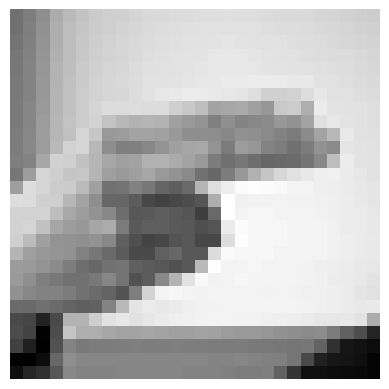

El valor predicho es: h, el valor real es: h


In [ ]:
# Select a random index from the test set
idx = np.random.randint(len(y_test))

# Plot the image
def plot_image(image):
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

plot_image(x_test[idx].reshape(28, 28))

# Prepare the input tensor for prediction
input_sample = x_test[idx].reshape(-1, 1)  # Shape: (784, 1)
input_tensor = Tensor(input_sample)

# Make a prediction
pred = model.predict(input_tensor)

# Extract the predicted and actual indices
predicted_index = pred[0]
actual_index = y_test[idx]

# Map indices to letters
predicted_letter = alphabet[predicted_index]
actual_letter = alphabet[actual_index]

print(f'El valor predicho es: {predicted_letter}, el valor real es: {actual_letter}')
